In [2]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm
from sklearn.model_selection import KFold
from hmmlearn.hmm import CategoricalHMM, GaussianHMM

In [3]:
Carl_all_sax_df=pd.read_pickle("../data/dataset/Carl_SAX_all.pkl")
Carl_all_sax=[]
for index,raw in Carl_all_sax_df.iterrows():
    Carl_all_sax.append(raw["Carl_SAX_all"])

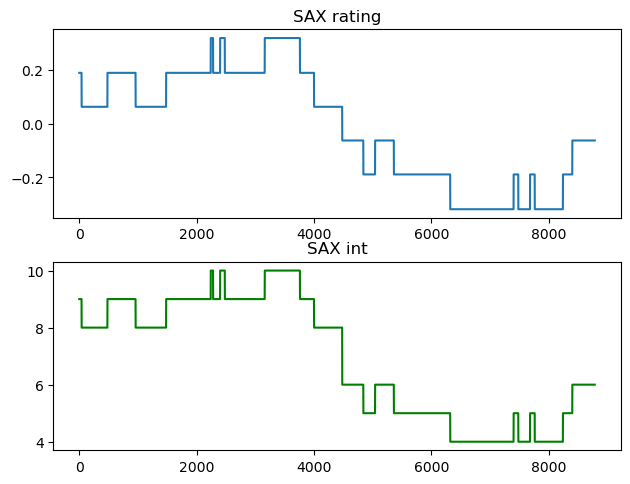

In [4]:
Carl_SAX_AllinOne = [item for part in Carl_all_sax for item in part]
counter=Counter(Carl_SAX_AllinOne)
key_list=[]
for key in counter:
    key_list.append(key)
key_list.sort()
SAX_to_int={}
for key_i,key in enumerate(key_list):
    SAX_to_int[key]=key_i
Carl_all_saxint=[]
for part in Carl_all_sax:
    session_int=[SAX_to_int[item] for item in part]
    Carl_all_saxint.append(session_int)
fig, ax = plt.subplots(2, 1)
fig.tight_layout()
plt.subplot(2,1,1)
plt.plot(Carl_all_sax[0])
plt.title("SAX rating")
plt.subplot(2,1,2)
plt.plot(Carl_all_saxint[0], "g-")
plt.title("SAX int")
plt.show()

## cross validation

In [ ]:
cv_fold=6
random_list=random.sample(range(len(Carl_all_saxint)),len(Carl_all_saxint))
Carl_SAX_rand=[Carl_all_saxint[i] for i in random_list]
tscv = KFold(n_splits=cv_fold)
model_list=[]
log_likelihood_list=[]
for train_index, test_index in tscv.split(random_list):
    train_data = [Carl_SAX_rand[i] for i in train_index]
    test_data = [Carl_SAX_rand[i] for i in test_index]
    print(len(train_data))
    print(len(test_data))
    model=CategoricalHMM(n_components=10) # 10 hidden state
    model.fit(np.array(train_data))
    model_list.append(model)
    log_likelihood = model.score(np.array(test_data))
    log_likelihood_list.append(log_likelihood)

0it [00:00, ?it/s]

73
15
73
15
73
15
73
15
74
14


IndexError: index 14 is out of bounds for axis 1 with size 14

In [90]:
print("mean log likelihood: ",end="")
print(np.mean(log_likelihood_list))
startprob_list=[m.startprob_ for m in model_list]
transmat_list=[m.transmat_ for m in model_list]
emissionprob_list=[m.emissionprob_ for m in model_list]
startprob_mean=sum(startprob_list)/len(startprob_list)
transmat_mean=sum(transmat_list)/len(transmat_list)
emissionprob_mean=sum(emissionprob_list)/len(emissionprob_list)
plt.plot(startprob_mean)
plt.show()
sns.heatmap(transmat_mean)
plt.show()
sns.heatmap(emissionprob_mean)
plt.show()

mean log likelihood: 

NameError: name 'log_likelihood_list' is not defined

In [27]:
model=CategoricalHMM(n_components=10) # 10 hidden state
model.fit(np.array(Carl_all_saxint))

CategoricalHMM(n_components=10, n_features=15,
               random_state=RandomState(MT19937) at 0x1D6BFB26240)

Initial state distribution:


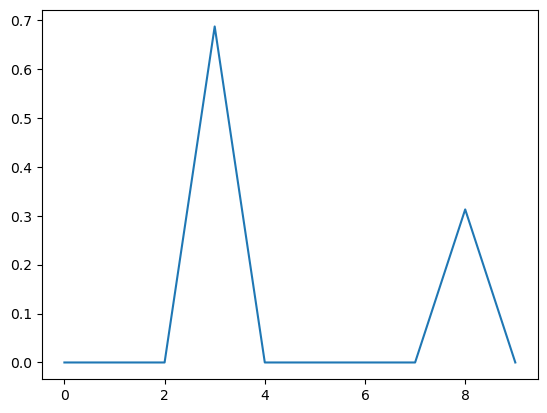


Transition matrix:


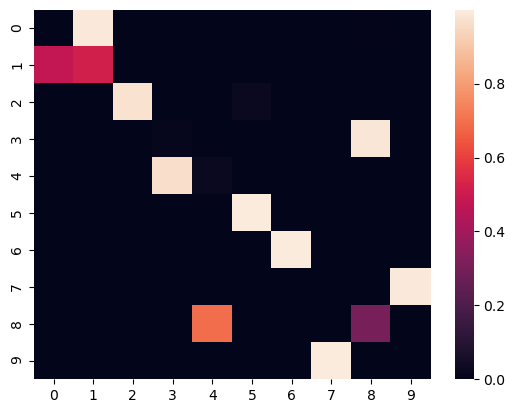


Emission probabilities:


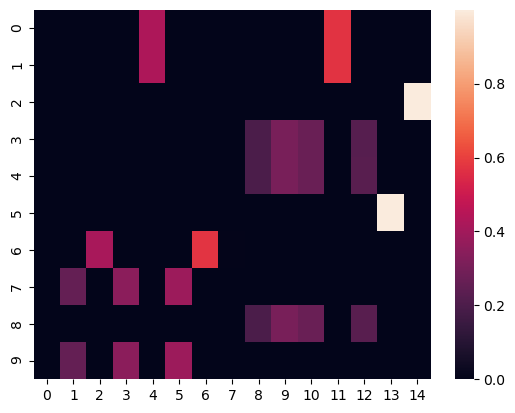

In [30]:
print("Initial state distribution:")
# print(model.startprob_)
plt.plot(model.startprob_)
plt.show()
print("\nTransition matrix:")
# print(model.transmat_)
sns.heatmap(model.transmat_)
plt.show()
print("\nEmission probabilities:")
# print(model.emissionprob_)
sns.heatmap(model.emissionprob_)
plt.show()

In [35]:
log_likelihood = model.score(np.array(Carl_all_saxint))
print(log_likelihood)

-788290.1627159582
